# Shai bootcamp Assignment

**1. Basic Data Exploration :** Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('Salaries.csv')

In [2]:
num_of_rows=df.shape[0]
num_of_cols=df.shape[1]
print(f'There is {num_of_rows} rows, and {num_of_cols} columns in the dataset.')

There is 148654 rows, and 13 columns in the dataset.


In [3]:
data_types = df.dtypes
data_types

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [4]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

We will notice that "Notes" and "Status" columns do not contain any values.(both of them are filled by NaN)

**2. Descriptive Statistics:** Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [5]:
print('mean salary: ',df['TotalPay'].mean())
print('median salary: ',df['TotalPay'].median())
print('mode: ',df['TotalPay'].mode())
print('min salary: ',df['TotalPay'].min())
print('max salary: ',df['TotalPay'].max())
print('range salary: ',df['TotalPay'].max() - df['TotalPay'].min())

mean salary:  74768.32197169267
median salary:  71426.60999999999
mode:  0    0.0
Name: TotalPay, dtype: float64
min salary:  -618.13
max salary:  567595.43
range salary:  568213.56


In [6]:
std=df['TotalPay'].std()
print('standard deviation of salaries: ',std)

standard deviation of salaries:  50517.00527394987


3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

The 'Notes' and 'Status' Columns are empty, so I will drop them.

In [7]:
df.drop(columns=['Notes', 'Status'],inplace=True)

In [8]:
df[(df['OvertimePay'].isna()) | (df['OtherPay'].isna())]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148646,148647,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco


Please be aware that these 4 records are empty, and I think the best approach to handle the missing values of 'OvertimePay' and 'OtherPay' columns is to delete these rows.

In [9]:
indexNaN = df[ (df['OvertimePay'].isna()) | (df['OtherPay'].isna())].index
df.drop(indexNaN , inplace=True)

I will assume that missing values are not only NaN values, but also any kind of incorrect data entry.

In [10]:
df[(df['OvertimePay']<0.0)| (df['BasePay']<0.0)][['BasePay','OvertimePay']]

,BasePay,OvertimePay
72832,-166.01,249.02
72865,-121.63,182.70
72872,-109.22,163.83
72874,-106.60,159.90
72878,-101.88,153.08
72884,-93.14,139.97
72888,-87.38,131.06
72894,-75.67,113.76
72908,-59.59,89.65
72920,-30.58,45.87


This is clearly a data entry error, BasePay should never have negative value as same as the OvertimePay.

To solve this issue I will assign the cells that have negative values to zero.

In [11]:
df.loc[df['OvertimePay']<0.0,'OvertimePay']=0.0
df.loc[df['BasePay']<0.0,'BasePay']=0.0

In [12]:
df[df['Benefits']<0.0][['Benefits','TotalPay','TotalPayBenefits']]

,Benefits,TotalPay,TotalPayBenefits
110528,-2.73,0.00,-2.73
110529,-8.20,0.00,-8.20
110530,-33.89,0.00,-33.89
144099,-13.80,9991.77,9977.97


This is also a very clear mistake, Benefits should have only positive values down to zero, it also clear that TotalPayBenefits have the same negative values of Benefits, so they need to bed fixed too.

To solve this issue I will also assign the cells that have negative values to zero.

In [13]:
df.loc[df['Benefits']<0.0,'Benefits']=0.0
df.loc[df['TotalPayBenefits']<0.0,'TotalPayBenefits']=0.0

Now filling the Remaining missing values with NaN values.
I will assign NaN values of Benefits to zero, and the values of BasePay to the average BasePay.

In [14]:
fill_values = pd.DataFrame({
                "Benefits" : 0.0,
                "BasePay" : df["BasePay"].mean()}, index=df.index)
df= df.combine_first(fill_values)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148650 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Agency            148650 non-null  object 
 1   BasePay           148650 non-null  float64
 2   Benefits          148650 non-null  float64
 3   EmployeeName      148650 non-null  object 
 4   Id                148650 non-null  int64  
 5   JobTitle          148650 non-null  object 
 6   OtherPay          148650 non-null  float64
 7   OvertimePay       148650 non-null  float64
 8   TotalPay          148650 non-null  float64
 9   TotalPayBenefits  148650 non-null  float64
 10  Year              148650 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 13.6+ MB


Note that we don't have any missing values any more, and as a result of removing the empty records the number of rows decreased by 4, and the number of columns decreased by 2 due to dropping the empty columns.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

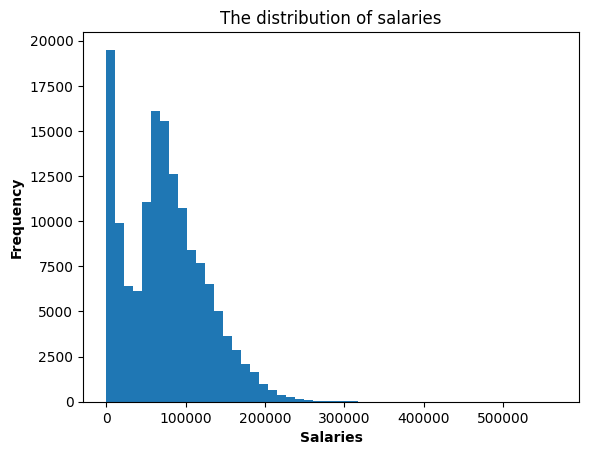

In [16]:
salaries = df['TotalPay'].tolist()

plt.hist(salaries,50)
plt.title('The distribution of salaries')
plt.xlabel('Salaries', color='black', fontweight='bold')
plt.ylabel('Frequency', color='black', fontweight='bold')
plt.show() 

In [17]:
df['Department'] = df['JobTitle'].apply(lambda x: x.split('(')[-1].split(')')[0] if '(' in x and ')' in x else 'Unknown')


unique_departments = df['Department'].unique()

print('The departments are: ',unique_departments)

The departments are:  ['Unknown' 'POLICE DEPARTMENT' 'FIRE DEPARTMENT' 'CIVIL & CRIMINAL'
 'CIVIL/CRIMINAL' 'MFCC' 'SEASONAL' 'Fire Dept' 'Cvl&Crmnl'
 'Civil & Criminal' 'SFERS' 'Police Department' 'Civil/Criminal'
 'Seasonal' 'Fire Department']


**NOTE:** The data contains some duplicate departments with different spellings or capitalizations. For example, (‘Cvl&Crmnl’ , ‘Civil/Criminal’, ‘CIVIL & CRIMINAL’ , ‘CIVIL/CRIMINAL’ , ‘Civil & Criminal’) all refer to the same department. To avoid confusion , we need to group these departments together under a single name.

In [18]:
replacements = {
    'Civil/Criminal': 'CIVIL & CRIMINAL',
    'Civil & Criminal': 'CIVIL & CRIMINAL',
    'Cvl&Crmnl': 'CIVIL & CRIMINAL',
    'CIVIL/CRIMINAL': 'CIVIL & CRIMINAL',
    'Police Department': 'POLICE DEPARTMENT',
    'Fire Department': 'FIRE DEPARTMENT',
    'Fire Dept': 'FIRE DEPARTMENT',
    'Seasonal': 'SEASONAL'
}

df['Department'] = df['Department'].replace(replacements)

In [19]:
proportion = df['Department'].value_counts(normalize=True).to_dict()
proportion

{'Unknown': 0.9825496131853346,
 'CIVIL & CRIMINAL': 0.010319542549613186,
 'POLICE DEPARTMENT': 0.004789774638412378,
 'SEASONAL': 0.0007803565422132527,
 'MFCC': 0.0006054490413723512,
 'FIRE DEPARTMENT': 0.0005247225025227044,
 'SFERS': 0.00043054154053144973}

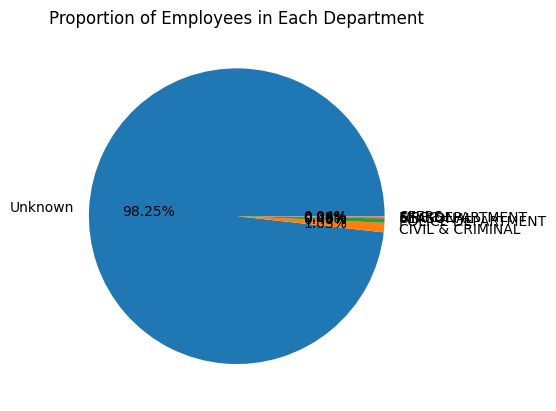

In [20]:
labels = list(proportion.keys())
values = list(proportion.values())


plt.pie(values, labels=labels, autopct='%.2f%%')
plt.title('Proportion of Employees in Each Department')
plt.show()

If we want to see the Proportions of the Departments excluding the "Unknown" Department:

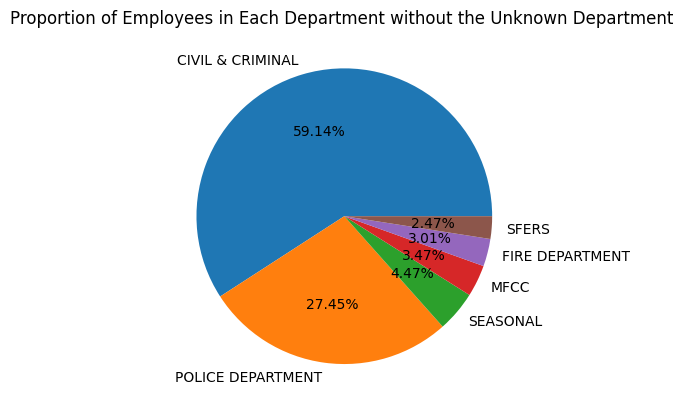

In [21]:
plt.pie(values[1:], labels=labels[1:], autopct='%.2f%%')
plt.title('Proportion of Employees in Each Department without the Unknown Department ')
plt.show()

Most employees belong to the Unknown department, and the CIVIL & CRIMINAL department has the largest number of employees among the known departments.






5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

In [22]:
df.groupby(by='Year').agg({'TotalPay':['mean','median','min','max','count']})

TotalPay                                     
              mean     median     min        max  count
Year                                                   
2011  71744.103871  68213.240    0.00  567595.43  36159
2012  74113.262265  70714.680    0.00  362844.66  36766
2013  77611.443142  74500.015    0.00  347102.32  37606
2014  75471.836912  72366.280 -618.13  471952.64  38119

In [23]:
df.groupby(by='Department').agg({'TotalPay':['mean','median','min','max','count']})

TotalPay                                        
                            mean      median      min        max   count
Department                                                              
CIVIL & CRIMINAL   136806.539283  150254.700     0.00  225366.50    1534
FIRE DEPARTMENT    236373.814872  242809.475  7093.37  333888.32      78
MFCC                67517.330222   79729.945  1122.70   97413.08      90
POLICE DEPARTMENT  158423.671517  152548.170   283.86  538909.28     712
SEASONAL             9382.643879    8380.800   293.40   20952.00     116
SFERS               87697.342344   84263.110   576.36  231739.64      64
Unknown             73675.415698   70715.930  -618.13  567595.43  146056

**.** The average salaries were highest in 2013 and lowest in 2011. The minimum salary was  0.0 in the years of 2011, 2012 and 2013 , but in 2014, it was -618.13.    
**.** The highest salary in 2011 was an outlier, as it is far away from the median.

**.** The Fire Department has the highest average salary of 236373.81, while the Seasonal Department has the lowest average salary of 9382.64.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

In [24]:
df["Benefits"].corr(df["TotalPay"])

0.6321869297680303

**.** There is a strong positive correlation between The Benefits variable and the TotalPay variable. 

**.** let's visualize the relationship:

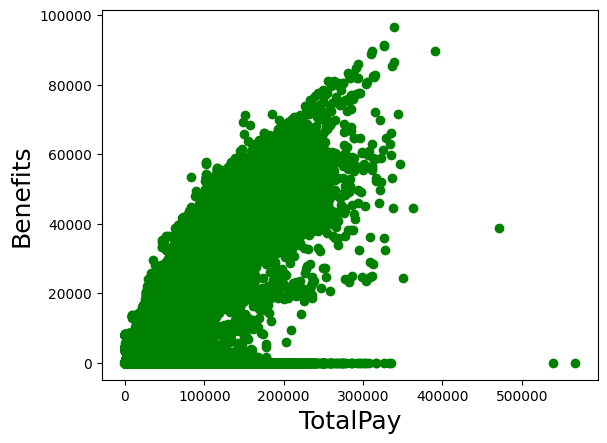

In [25]:
plt.scatter(df['TotalPay'],df['Benefits'],color = 'g')
plt.xlabel("TotalPay", color = 'black', size = 18)
plt.ylabel("Benefits", color = 'black', size = 18)
plt.show()

7. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

**Here are some insights**:

The dataset represents the employees in San Francisco from 2011 to 2014.

There is a **strong correlation** between BasePay and Benefits, and a **weak correlation** between TotalPay and Year.

The distribution of salary has **positive** skewe, Because both mode and median are lower than mean,

in this order: mode<median<mean.

 The status column in the data is blank, which means that the data does not provide any information about the employment status of the employees, such as full-time, part-time, contract, etc.

A **negative value of OtherPay** seems unrealistic and suggests a data error. Alternatively, it could indicate that some employees were penalized for causing losses.